# Practice 3 - Linear regression

In this practice, I analyzed two datasets. The first dataset focuses on 2D dimensional materials, with the target variable being band gap (gap_opt) and the feature variable being formation energy (e_form). I performed data exploratory and linear regression, assuming a linear dependence between the two features. 
homocedasticity. In the second dataset, the profit, measured in $100000, is plotted against city population, measured in units of 10000 people. The cost function was visualized, and the parameters equation and data fit were obtained.


In [35]:
#Import libraries
import pandas as pd
from matminer.datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns 

## Load the dataset and data exploratory.
This dataset was extracted from Matminer, a Python library for computational materials science. The dataset, named jarvis_dft_2d, calculates various properties of 636 2D-materials using first principles calculations with the OptB88vdW and TBmBJ functionals, sourced from the JARVIS DFT database. This dataset is intriguing due to the increased research in 2D materials aimed at developing new nanotechnologies with applications in quantum computing, nanoelectronics, catalysts, and the detection of toxic molecules. Predicting the implications of these new types of nanomaterials for the future development of renewable technologies is of utmost importance.  \
I chose to use only two features from the dataset to reduce computing time and created a simple linear regression model with an independent and dependent variable. The feature formation energy represents the energy required to disassemble the system in thermal equilibrium with its surroundings. Likewise, the band gap refers to the energy required for an electron in the valence band to transition to the conduction band. These two properties can be experimentally determined and are crucial for characterizing semiconductor materials, particularly for nanoelectronics devices. The assumption that the band gap depends linearly on the formation energy is reductionist but necessary to test in practice.
The exploratory analysis of the dataset entails plotting the data, providing a basic summary of the dataset, and utilizing bar graphs to visually represent the information. The static description shows that the mean values of the band gap and formation energys are  -0.84 eV/atom and 1.39 eV respectively. We can see in the graph bar that there are more 2D systems with a formation energy with values between 0 and 1 but in contrast there are less 2D materials with a energey smaller than -3, this is important because a smaller energy formation indicates more posibilities of dinamical stability and capable to be synthesized. The bar graph depicting the band gap of 2D materials illustrates that most have a band gap of around 6 eV, which is deemed unfavorable due to the high energy requirements for electrical flow. However, a significant proportion possess a smaller band gap, less than 2 eV, making them suitable for visible light detection.
### Reference
2D Dataset discussed in: High-throughput Identification and Characterization of Two dimensional Materials using Density functional theory Kamal Choudhary, Irina Kalish, Ryan Beams & Francesca Tavazza Scientific Reports volume 7, Article number: 5179 (2017) Original 2D Data file sourced from: choudhary, kamal; https://orcid.org/0000-0001-9737-8074 (2018): jdft_2d-7-7-2018.json. figshare. Dataset.

In [21]:
#Load dataset from matminer
df = load_dataset('jarvis_dft_2d') 
df.head()

,epsilon_x opt,epsilon_y opt,epsilon_z opt,exfoliation_en,structure,e_form,structure initial,jid,gap tbmbj,epsilon_x tbmbj,epsilon_y tbmbj,epsilon_z tbmbj,mpid,gap opt,composition
0,10.3295,10.3295,7.0367,63.593833,"[[1.49323139 3.32688406 7.26257785] Hf, [3.326...",-0.624,"[[1.49180494 3.32370494 7.25734791] Hf, [3.323...",JVASP-19990,NaN,NaN,NaN,NaN,mp-13963,0.0341,"(Hf, Si, Te)"
1,4.7325,5.6477,2.6267,134.863750,"[[1.85068084 4.37698238 6.9301577 ] As, [0. ...",0.160,"[[1.85325003 4.36491291 6.93222312] As, [0. ...",JVASP-31349,NaN,NaN,NaN,NaN,mp-158,0.7467,(As)
2,6.4357,5.2377,3.0070,43.114667,"[[ 0. 2.0213325 11.97279555] Ti, [ 1...",-2.231,"[[ 0. 2.0239455 11.96404455] Ti, [ 1...",JVASP-27890,NaN,NaN,NaN,NaN,mp-23002,0.0023,"(Ti, Br, O)"
3,9.3915,9.3915,4.2669,240.715488,"[[2.39882726 2.39882726 2.53701553] In, [0.054...",0.240,"[[2.53701507 2.53701507 2.53701604] In, [0.057...",JVASP-31353,NaN,NaN,NaN,NaN,mp-23313,0.0266,"(In, Bi)"
4,2.7367,2.7367,2.0162,67.442833,[[-1.83484554e-06 1.73300105e+00 2.61675943e...,-2.245,[[-2.000000e-06 1.731207e+00 2.616762e+00] N...,JVASP-31356,NaN,NaN,NaN,NaN,mp-25214,0.0484,"(Nb, O)"


In [26]:
#I have only selected two features
df1=df.iloc[0:636,[5,13]]
df1

,e_form,gap opt
0,-0.624,0.0341
1,0.160,0.7467
2,-2.231,0.0023
3,0.240,0.0266
4,-2.245,0.0484
...,...,...
631,0.082,3.3695
632,-2.057,0.1178
633,-0.062,1.3010
634,-0.101,1.8036


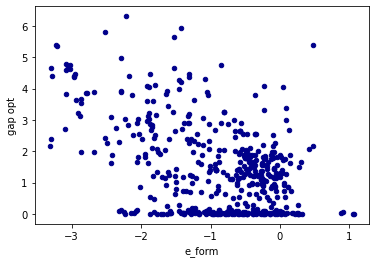

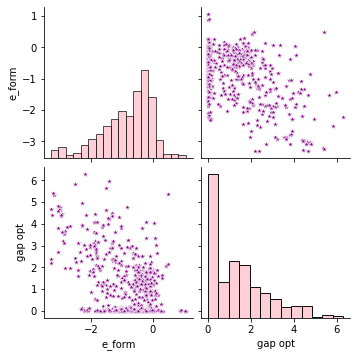

,e_form,gap opt
count,633.000000,522.000000
mean,-0.841975,1.396489
std,0.819861,1.378082
min,-3.316000,0.000100
25%,-1.314000,0.067475
50%,-0.631000,1.216700
75%,-0.241000,2.084300
max,1.068000,6.309900


In [100]:
df1.plot.scatter(x='e_form',y='gap opt',c='DarkBlue') #scattering de datos
sns.pairplot(df1,
            plot_kws={'color':'purple','marker':'*'}
            ,diag_kws={'color':'pink'})
plt.show()
df1.describe()

In [83]:
x_train1=df1.iloc[0:317,[0]]
x_train=x_train1.dropna()
x_train=x_test.iloc[0:245]
print('x_train',x_train)

y_train1=df1.iloc[0:317,[1]]
y_train=y_train1.dropna()
print('ytrain',y_train)

x_test1=df1.iloc[318:635,[0]]
x_test=x_test1.dropna()
x_test=x_test.iloc[0:276]
print('x_test',x_test)

y_test1=df1.iloc[318:635,[1]]
y_test=y_test1.dropna()
print('y_test',y_test)

x_train      e_form
318  -0.626
319  -0.941
320  -0.109
321  -0.259
322  -0.761
..      ...
559  -0.923
560   0.252
561  -1.426
562  -0.356
563  -0.571

[245 rows x 1 columns]
ytrain      gap opt
0     0.0341
1     0.7467
2     0.0023
3     0.0266
4     0.0484
..       ...
311   0.0824
312   1.8198
313   1.7882
314   0.4340
316   0.7311

[245 rows x 1 columns]
x_test      e_form
318  -0.626
319  -0.941
320  -0.109
321  -0.259
322  -0.761
..      ...
590  -2.143
591  -0.888
592  -2.673
593  -1.758
594  -0.884

[276 rows x 1 columns]
y_test      gap opt
318   0.0512
319   1.5861
320   0.9034
321   1.1351
322   1.2526
..       ...
630   0.0128
631   3.3695
632   0.1178
633   1.3010
634   1.8036

[276 rows x 1 columns]


# Applying linear regression.

In [84]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train,y_train)
print(reg.score(x_train,y_train))

0.00022590550529111297


In [92]:
#Prediction on test data
print(reg.coef_)
print(reg.intercept_)
y_pred = reg.predict(x_test)
print(y_pred)

[[-0.02369094]]
[1.17174827]
[[1.1865788 ]
 [1.19404144]
 [1.17433058]
 [1.17788422]
 [1.18977707]
 [1.17392783]
 [1.18039546]
 [1.19456265]
 [1.17511238]
 [1.18444661]
 [1.18574961]
 [1.18984815]
 [1.17932937]
 [1.19451526]
 [1.17435427]
 [1.20467868]
 [1.18359374]
 [1.18904266]
 [1.20287817]
 [1.17345401]
 [1.18712369]
 [1.18904266]
 [1.17807375]
 [1.18075083]
 [1.1808219 ]
 [1.19399406]
 [1.19309381]
 [1.19574719]
 [1.18669725]
 [1.19257261]
 [1.17916353]
 [1.19510754]
 [1.20287817]
 [1.21008021]
 [1.20233327]
 [1.18702893]
 [1.20259388]
 [1.17380938]
 [1.19539183]
 [1.18020593]
 [1.1732171 ]
 [1.16909488]
 [1.17511238]
 [1.17018466]
 [1.18032439]
 [1.17966104]
 [1.18721845]
 [1.22465014]
 [1.20193053]
 [1.17786053]
 [1.17963735]
 [1.22223367]
 [1.20626597]
 [1.24976254]
 [1.17470963]
 [1.19880332]
 [1.17065848]
 [1.21623986]
 [1.17681813]
 [1.18049022]
 [1.16954501]
 [1.20785326]
 [1.21024605]
 [1.18759751]
 [1.18361743]
 [1.20318615]
 [1.21664261]
 [1.18795287]
 [1.21451042]
 [1.1

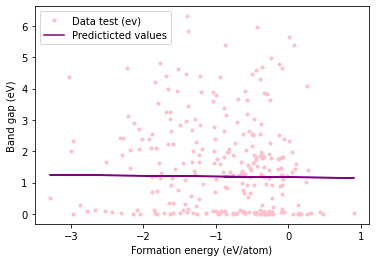

In [99]:
# Plot the regression line with actual data pointa
x=x_test.to_numpy()
y=y_test.to_numpy()
plt.plot(x, y, '.', label='Data test (ev) ',color='pink')
plt.plot(x, y_pred, label='Predicticted values',color='purple')
plt.xlabel('Formation energy (eV/atom)')
plt.ylabel('Band gap (eV)')
plt.legend()
plt.show()

## Conclusion
The linear approximation used for the fit line is too simplistic and fails to accurately represent the test values. However, the prediction is reasonably accurate in the vicinity of the fit data. For a more accurate estimate of the band gap, it is necessary to explore alternate machine learning algorithms that take into account additional features. 

# Aditional dataframe 
An additional dataset for linear regression is provided here, obtaining the equiation of parametrs while also displaying the cost function graphically.

    Population    Profit
0       6.1101  17.59200
1       5.5277   9.13020
2       8.5186  13.66200
3       7.0032  11.85400
4       5.8598   6.82330
5       8.3829  11.88600
6       7.4764   4.34830
7       8.5781  12.00000
8       6.4862   6.59870
9       5.0546   3.81660
10      5.7107   3.25220
11     14.1640  15.50500
12      5.7340   3.15510
13      8.4084   7.22580
14      5.6407   0.71618
15      5.3794   3.51290
16      6.3654   5.30480
17      5.1301   0.56077
18      6.4296   3.65180
19      7.0708   5.38930
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB
None
32.072733877455676
h(x)=-3.79+1.18x1


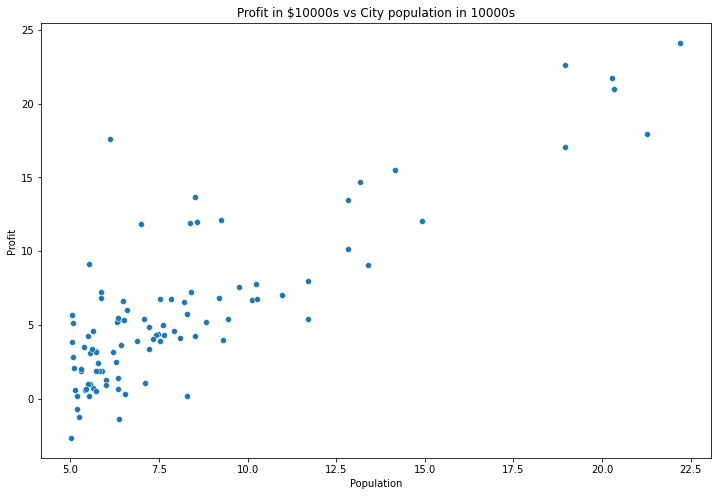

In [102]:
#Exportamos las librerias
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 

#Estilo de la gráfica
%matplotlib inline
plt.rcParams['figure.figsize']=(12,8)

#Exportación de datos
data = pd.read_csv('bike_sharing_data.txt')
print(data.head(20))
print(data.info())

#Visualize the data
ax = sns.scatterplot(x='Population', y='Profit', data=data)
ax.set_title('Profit in $10000s vs City population in 10000s');

#Cost function
def cost_function(X,y,theta):
    m = len(y)
    y_pred =  X.dot(theta)
    error = (y_pred-y)**2
    
    return 1/(2*m)*np.sum(error)

m = data.Population.values.size
X = np.append(np.ones((m,1)),data.Population.values.reshape(m,1),axis=1)
y = data.Profit.values.reshape(m,1)
theta = np.zeros((2,1))
print(cost_function(X, y, theta))

#Gradient descent
def gd(X,y,theta,alpha,iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(),(y_pred-y))
        theta -= alpha * 1/m * error
        costs.append(cost_function(X, y, theta))        
    return theta,costs        
#Implementation
theta, costs = gd(X,y,theta,alpha=0.01,iterations=2000)
print("h(x)={}+{}x1".format(str(round(theta[0,0],2)),str(round(theta[1,0],2))))


# Cost function J($\theta$)

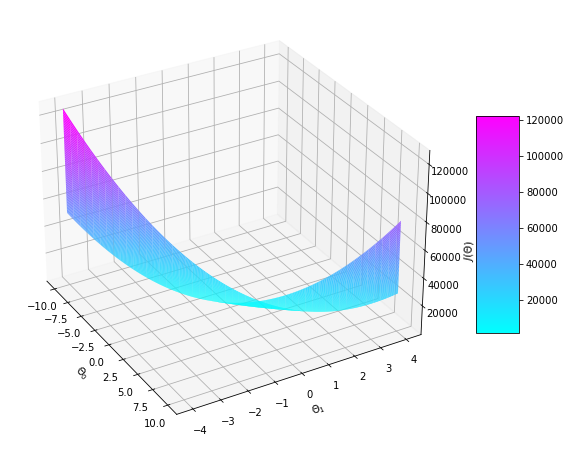

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[-3.79 -2.61 -1.43 -0.25  0.93  2.11  3.29  4.47  5.65  6.83  8.01  9.19
 10.37 11.55 12.73 13.91 15.09 16.27 17.45 18.63 19.81 20.99 22.17 23.35
 24.53 25.71 26.89 28.07 29.25 30.43]


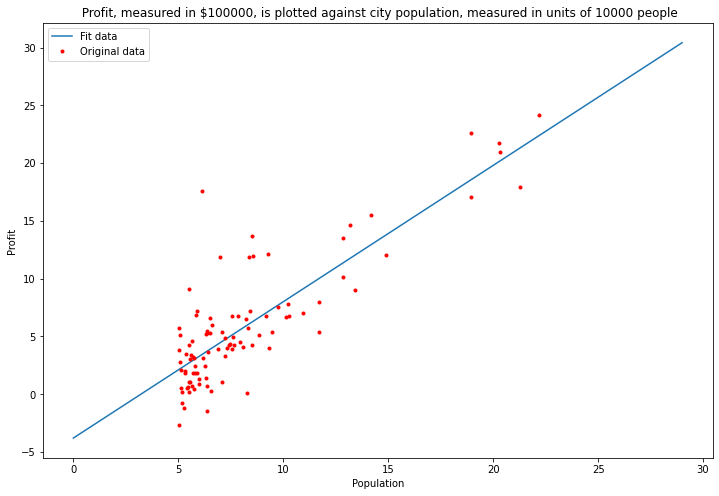

In [124]:
def h(x):
    return -3.79+1.18*x

x=np.arange(0, 30 ,1) 
print(x)
y=h(x)
print(y)
data_x=data.iloc[0:,[0]]
data_y=data.iloc[0:,[1]]
plt.plot(x,y,label='Fit data')
plt.plot(data_x.to_numpy(),data_y.to_numpy(),'r.',label='Original data')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend()
plt.title(' Profit, measured in $100000, is plotted against city population, measured in units of 10000 people')
plt.show()